Data Description:
The dataset consists of two files, the players.csv file is a descriptive file on the indiviual player, it had 6 columns and 196 rows. The second dataset is the sessions.csv dataset which consists of more quantitative data on time played, it has 5 variables and 1536 rows. The variables of the players.csv file are:
- Experience (the values are descriptive: pro, veteran, regular, beginer)
- subscribe (True or False)
- hashed email (player identification)
- played hours (number of hours played)
- Gender (qualitative)
- age (number)
- individualID
- organization name
The question that we will try to answer is question 1: which "kind" of players are most likely to contribute a large amount of data so we can get those players in our recruiting efforts. 

In [8]:
library(repr)
library(tidyverse)

In [13]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


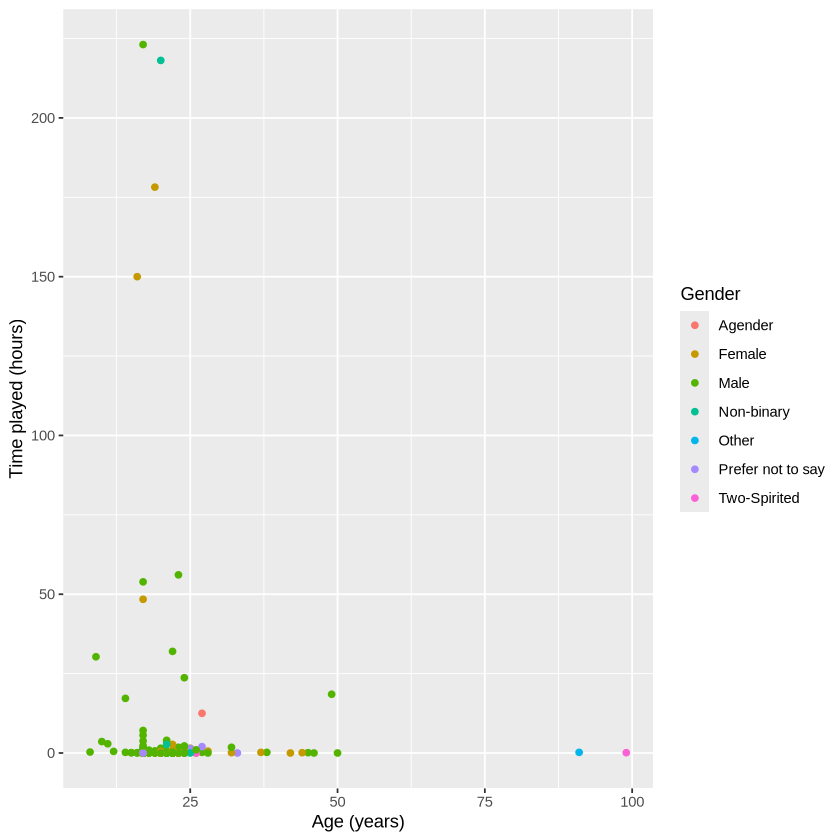

In [14]:
exploratory_plot<- players |>
    ggplot(aes(x=age, y=played_hours, color = gender)) +
    geom_point() +
    labs(x="Age (years)", y = "Time played (hours)", color="Gender")
exploratory_plot

We will perform regression with k nearest neighbor to predict the hours a player played based on the age, gender and experience level. this method is appropriate because the data is qualitative. An assumption is that there is some correlation in the dataset. we will compare the model by having a training split and a testing split, where we will train the model on the training set and then perform thefinal test on the testing set. The split will happen at the very beginning of the project, we will split the data into 70/30 training/test. There will be a validation set and we will perform cross validation.

In [17]:
players_tidy <- players|>
    select(experience, subscribe, played_hours, gender, age)

players_tidy

experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17
